# Python for Data Analysis

Book:
http://wesmckinney.com/pages/book.html

GitHub:
https://github.com/wesm/pydata-book

## 0. Terminology

* Time series: a series of data points listed in time order
* Data munging/wrangling/munge: transforming messy data into a structured format for processing

## 1. Libraries Overview

* NumPy
    * `ndarray` -- fast multidimensional array
    * C interop
    * Linear algebra operations
    * More efficient arrays
    
    
* pandas
    * High-level data structures for working with structured data
    * In particular `DataFrame` and `Series`
    
    
* matplotlib
    * Produces plots and other 2D data visulizations
    
    
* scipi
    * Various scientific computing functions
    * E.g., statistical tests, etc.
    
    
* scikit-learn
    * General-purpose machine learning
    
    
* statsmodels
    * Classical statistics and econometric algorithms
    


## 2. Import conventions
It's bad practice to import everything, like:
`from numpy import *`

This will take in a huge package (snigger).

Instead, the following import conventions are used:

    * `import numpy as np`
    * `import matplotlib.pyplot as plt`
    * `import pandas as pd`
    * `import seaborn as sns`
    * `import statsmodel as sm`
    
This allows you to call, say, `np.arange`, so you can clearly see `.arange` is coming from the `np` package.

## 3. Python Reminder/Tips
This section just contains some points that weren't covered in the previous Python tutorial.

### 3.1 Object Introspection

In [39]:
# Use ? to find out information about an object,
# or to show a function's docstring

my_list = [1, 2, 3]

my_list?

my_list.insert?

### 3.2 %run/%load
Use %run or %load (Jupyter) to run a .py script.

In [10]:
# %run test_script.py

# %load test_script.py

### 3.3 Magic Commands
Magic commands are special IPython commands not available in Python itself.

They are prefixed by %.

E.g., `%timeit`

You can use ? with these commands too.

Use the following to get a list of magic commands:

`%quickref`
`%magic`

In [15]:
# Enter debugger
%debug?

# Delete all defined variables/names
%reset

# Pretty-print the object and display it via pager
%page OBJECT

# Delete a variable and attempt to clear al references to it
%xdel VARIABLE

# Let's you see matplotlibs in Jupyter
%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? n
Nothing done.
Object `OBJECT` not found
NameError: name 'VARIABLE' is not defined
Using matplotlib backend: MacOSX


ERROR:tornado.application:Exception in callback functools.partial(<function wrap.<locals>.null_wrapper at 0x10e7e2f28>)
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 605, in _run_callback
    ret = callback()
  File "/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 265, in enter_eventloop
    self.eventloop(self)
  File "/anaconda3/lib/python3.6/site-packages/ipykernel/eventloops.py", line 277, in loop_cocoa
    show.mainloop()
AttributeError: 'function' object has no attribute 'mainloop'


### 3.4 matplotlib in Jupyter

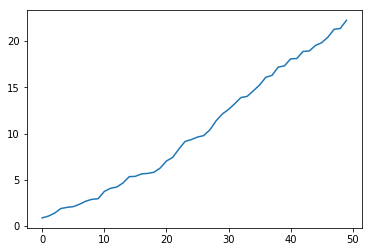

In [17]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(np.random.rand(50).cumsum())

### 3.5 Keyword Arguments
Functions can take keyword arguments.

In [22]:
def my_func(x, y, z):
    print("x is {}, y is {}, and z is {}".format(x, y, z))
    
my_func(x=3, z=10, y = 2)

x is 3, y is 2, and z is 10


### 3.6 Binding
Assigning is sometimes referred to as __binding__, and variables that have been assigned may be referred to as __bound variables__.

### 3.7 Checking conformity
As well as using isinstance, you can define a function to check if something implements a certain protocol, throwing an error if it does not.

In [26]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError:
        return False

x = 5

if not isinstance(x, list) and isiterable(x):
    x = list(x)
    
print(x)

5


### 3.8 Scalar Value Types
I.e., primitive types

* None
* str
* bytes
* float
* bool
* int

### 3.9 Interpret characters as-is
Use r before the string. (I.e., don't interpret the characters as escape characters.) Like @ in C#.

In [28]:
my_str = r"this string\does not contain\special characters."

print(my_str)

this string\does not contain\special characters.


### 3.10 Printing readable date strings
Use `.strftime(...)`.

In [33]:
from datetime import datetime, date, time

dt = datetime(2017, 1, 21, 20, 30, 21)
dt.strftime('%m/%d/%y %H:%M')

'01/21/17 20:30'

### 3.12 Extracting variables
When unpacking variables, you can use the `*rest` keyword to get the remaining arguments. Note, rest here is just an example and can be anything, such as an underscore (_).

In [35]:
my_list = 1, 2, 3, 4, 5

a, b, *rest = my_list

print(a, b)

print(rest)

1 2
[3, 4, 5]


### 3.13 Sort Keys

In [38]:
my_list = ["he", "ate", "a", "great", "hotdog"]

my_list.sort(key=len)

print(my_list)

['a', 'he', 'ate', 'great', 'hotdog']


### 3.14 Understanding nested comprehension
This is just a nice example.

In [3]:
some_tuples = ((1,2,3),(4,5,6),(7,8,9))

flattened = [x for tup in some_tuples for x in tup]

print(flattened)

# This is the same as:

flattened = []

for tup in some_tuples:
    for x in tup:
        flattened.append(x)
        
print(flattened)

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]


### 3.15 Using a list of functions to clean strings 

In [8]:
import re

# Just another nice example
def remove_punctuation(str):
    return re.sub("[!#?]", "", str)
                  
                  
def clean_strings(strings, ops):
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result
                  
states = ["    alabama", "Georgia!", "West Virginia?  "]
clean_ops = [str.strip, remove_punctuation, str.title]              
    
clean_strings(states, clean_ops)

['Alabama', 'Georgia', 'West Virginia']

### 3.16 itertools
The `itertools` module has a collection for generators, such as groupby, combinations, etc. Similar to LINQ statements in C#.

In [14]:
import itertools

first_letter = lambda x: x[0]

names = ["Adam", "Alan", "Jennifer", "Josie", "James"]

for letter, names in itertools.groupby(names, first_letter):
    print(letter, list(names)) # Names is a generator

('A', ['Adam', 'Alan'])
('J', ['Jennifer', 'Josie', 'James'])


## 2. NumPy Basics